## 🛍️ Mall Customer Segmentation using K-Means Clustering
This project applies K-Means Clustering to perform customer segmentation on a mall's customer dataset. The goal is to group customers into distinct clusters based on features such as Age, Gender, Annual Income, and Spending Score to better understand consumer behavior and target marketing strategies effectively.

Clustering allows businesses to tailor their services and marketing efforts by identifying groups such as:

High-income, low-spending customers

Young, high-spending customers

Budget-conscious frequent shoppers

Older, low-engagement customers, etc.

This unsupervised machine learning approach helps in data-driven decision-making for customer relationship management (CRM) and targeted advertising.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [3]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop('CustomerID',axis=1,inplace=True)

In [6]:
df1 = df.copy()

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded = le.fit_transform(df1['Gender'])
df1['Gender'] = encoded


In [8]:
for i,ax in enumerate(le.classes_):
    print(f"{i}->{ax}")

0->Female
1->Male


In [9]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [10]:
from sklearn.preprocessing import MinMaxScaler
# Columns to normalize
cols_to_normalize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Initialize scaler
scaler = MinMaxScaler()

# Normalize
df1[cols_to_normalize] = scaler.fit_transform(df1[cols_to_normalize])

In [11]:
df1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0.019231,0.000000,0.387755
1,1,0.057692,0.000000,0.816327
2,0,0.038462,0.008197,0.051020
3,0,0.096154,0.008197,0.775510
4,0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0,0.326923,0.860656,0.795918
196,0,0.519231,0.909836,0.275510
197,1,0.269231,0.909836,0.744898
198,1,0.269231,1.000000,0.173469


## Visualize the data

In [12]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
encoded = le1.fit_transform(df1['Gender'])
df['Gender'] = encoded


<Axes: >

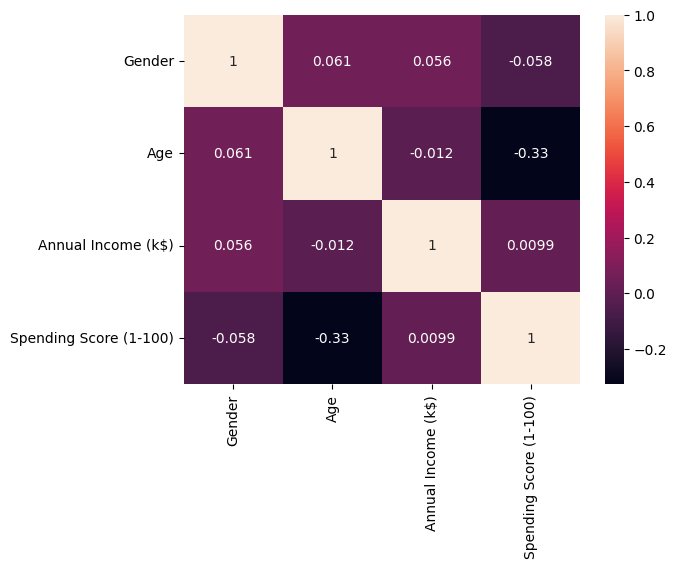

In [13]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

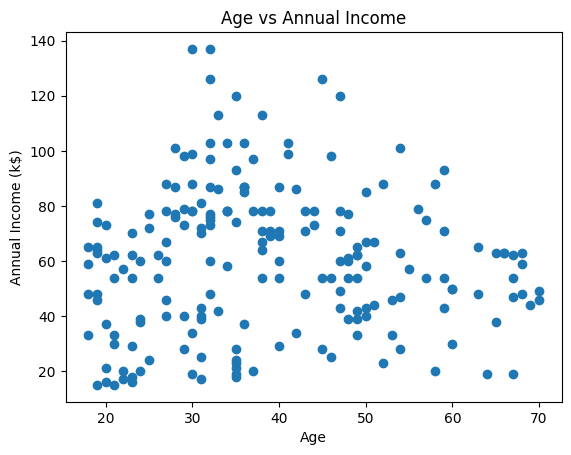

In [14]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Age')

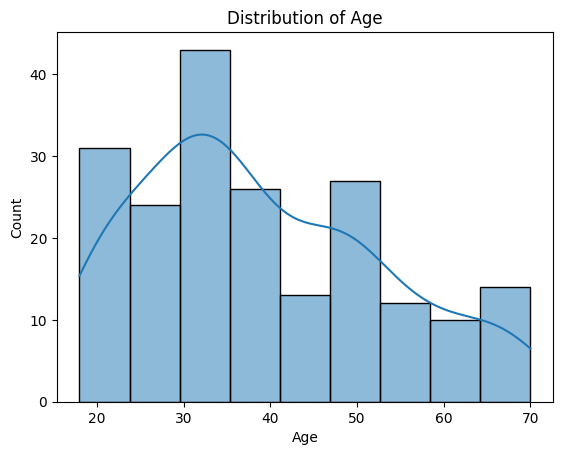

In [15]:
sns.histplot(df['Age'],kde=True)
plt.title("Distribution of Age")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Annual Income (k$)')

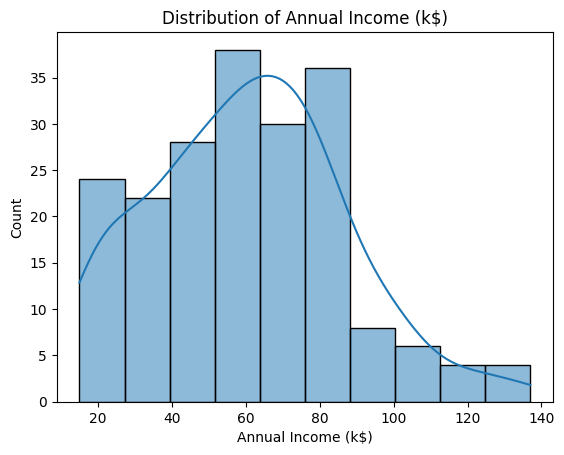

In [16]:
sns.histplot(df['Annual Income (k$)'],kde=True)
plt.title("Distribution of Annual Income (k$)")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Spending Score (1-100)')

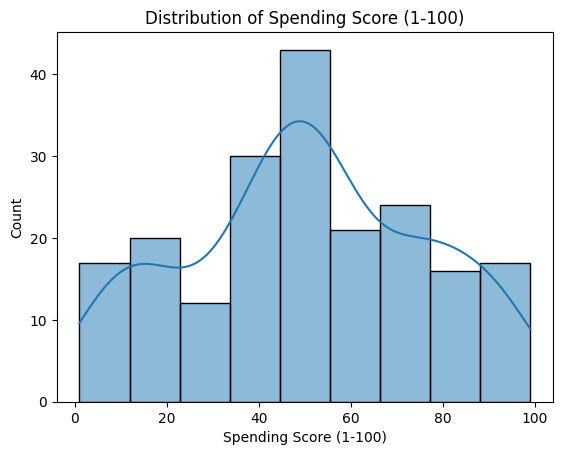

In [17]:
sns.histplot(df['Spending Score (1-100)'],kde=True)
plt.title("Distribution of Spending Score (1-100)")


In [18]:
set(df1['Gender'])

{0, 1}

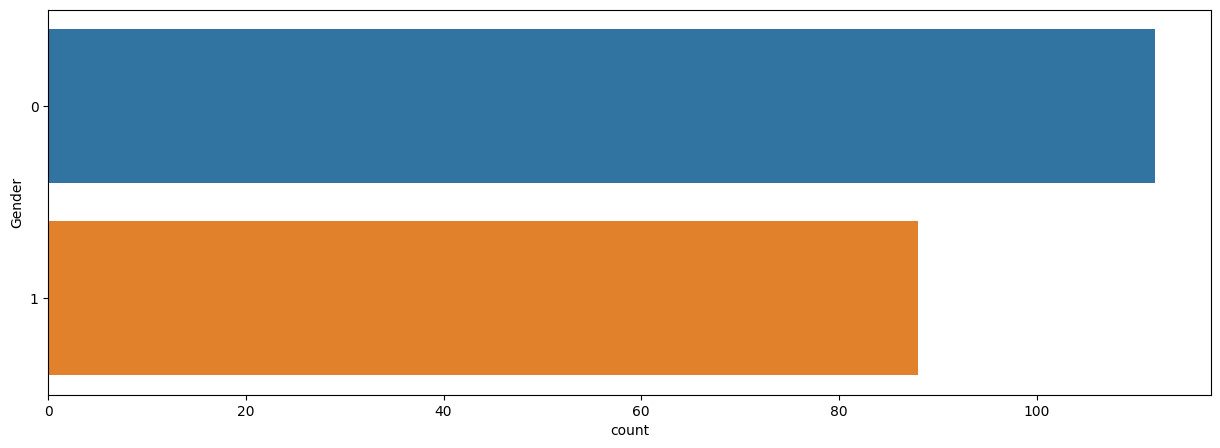

In [19]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df1)
plt.show()

## Segmentation using Age And Gender


In [20]:
X_1 = df1[['Age','Gender']]

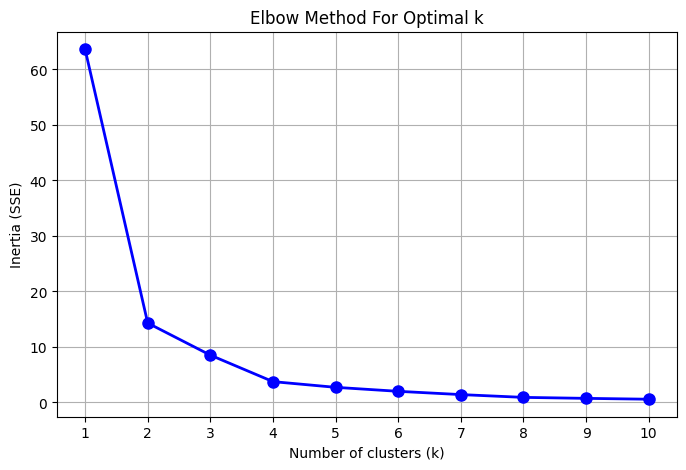

In [21]:
from sklearn.cluster import KMeans
# Elbow method: compute inertia for k=1 to 10
inertia = []
K_range_1 = range(1, 11)
for k in K_range_1:
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=42)
    kmeans.fit(X_1)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range_1, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K_range_1)
plt.grid(True)
plt.show()

Best K here is 4

/tmp/ipykernel_35/3040679674.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_1['Cluster'] = m1.fit_predict(X_1)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


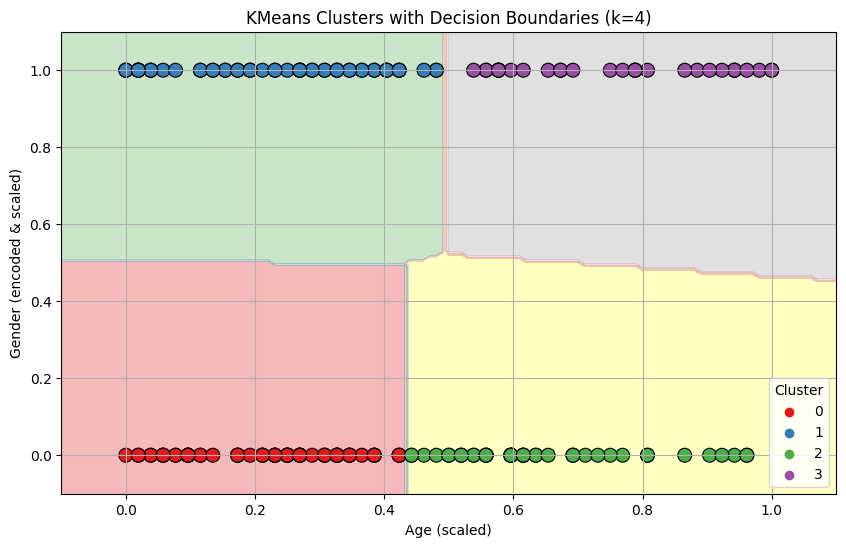

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Fit KMeans model (if not already done)
m1 = KMeans(n_clusters=4, n_init=10, random_state=42)
X_1['Cluster'] = m1.fit_predict(X_1)

# Create mesh grid over feature space
h = 0.01  # step size
x_min, x_max = X_1['Age'].min() - 0.1, X_1['Age'].max() + 0.1
y_min, y_max = X_1['Gender'].min() - 0.1, X_1['Gender'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict cluster labels for each grid point
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = m1.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))

# Background colored by cluster label
plt.contourf(xx, yy, Z, cmap='Set1', alpha=0.3)

# Scatter plot of actual data points
sns.scatterplot(data=X_1, x='Age', y='Gender', hue='Cluster', palette='Set1', s=100, edgecolor='k')

plt.title('KMeans Clusters with Decision Boundaries (k=4)')
plt.xlabel('Age (scaled)')
plt.ylabel('Gender (encoded & scaled)')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


## Segmentation using Annual Income (k$) and Spending Score (1-100)


In [23]:
X_2 = df1[['Annual Income (k$)','Spending Score (1-100)']]

In [24]:
X_2

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


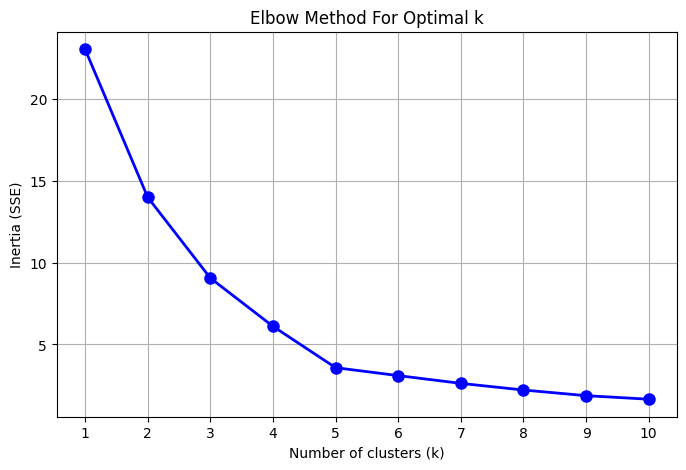

In [25]:
# Elbow method: compute inertia for k=1 to 10
inertia = []
K_range_2 = range(1, 11)
for k in K_range_2:
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=42)
    kmeans.fit(X_2)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range_2, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K_range_2)
plt.grid(True)
plt.show()

For Segmentation using Annual Income (k$) and Spending Score (1-100) We get optimal K = 5

/tmp/ipykernel_35/1725981066.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2['Cluster'] = m2.fit_predict(X_2)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


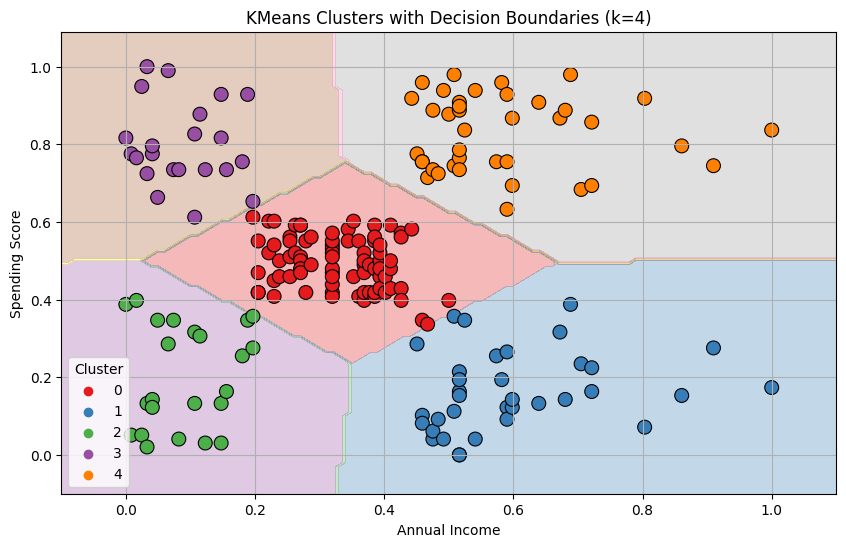

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Fit KMeans model (if not already done)
m2 = KMeans(n_clusters=5, n_init=10, random_state=42)
X_2['Cluster'] = m2.fit_predict(X_2)

# Create mesh grid over feature space
h = 0.01  # step size
x_min, x_max = X_2['Annual Income (k$)'].min() - 0.1, X_2['Annual Income (k$)'].max() + 0.1
y_min, y_max = X_2['Spending Score (1-100)'].min() - 0.1, X_2['Spending Score (1-100)'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict cluster labels for each grid point
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = m2.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))

# Background colored by cluster label
plt.contourf(xx, yy, Z, cmap='Set1', alpha=0.3)

# Scatter plot of actual data points
sns.scatterplot(data=X_2, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100, edgecolor='k')

plt.title('KMeans Clusters with Decision Boundaries (k=4)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True)
plt.legend(title='Cluster')
plt.savefig('fig1.png')
plt.show()


In [27]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score
score = silhouette_score(X_2.drop('Cluster', axis=1),X_2['Cluster'])

print(f"Silhouette Score for KMeans (k=5): {score:.4f}")


Silhouette Score for KMeans (k=5): 0.5595


## Segmentation using Age and Spending Score

In [28]:
X_3  = df1[['Age','Spending Score (1-100)']]

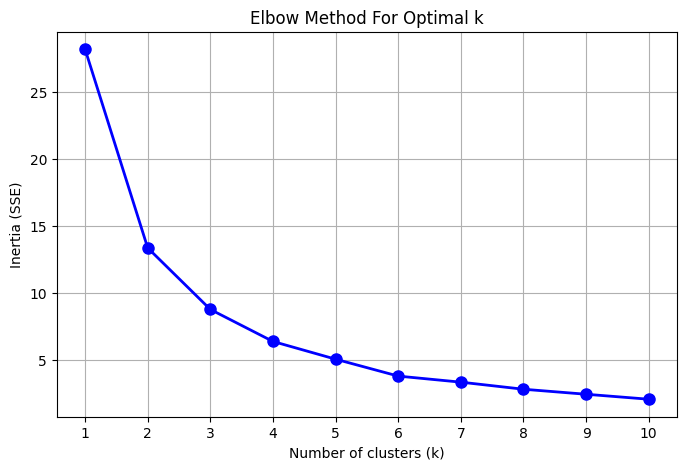

In [29]:
# Elbow method: compute inertia for k=1 to 10
inertia = []
K_range_3 = range(1, 11)
for k in K_range_3:
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=42)
    kmeans.fit(X_3)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range_3, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K_range_3)
plt.grid(True)
plt.show()

Best k is 5

/tmp/ipykernel_35/4098380661.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_3['Cluster'] = m3.fit_predict(X_3)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


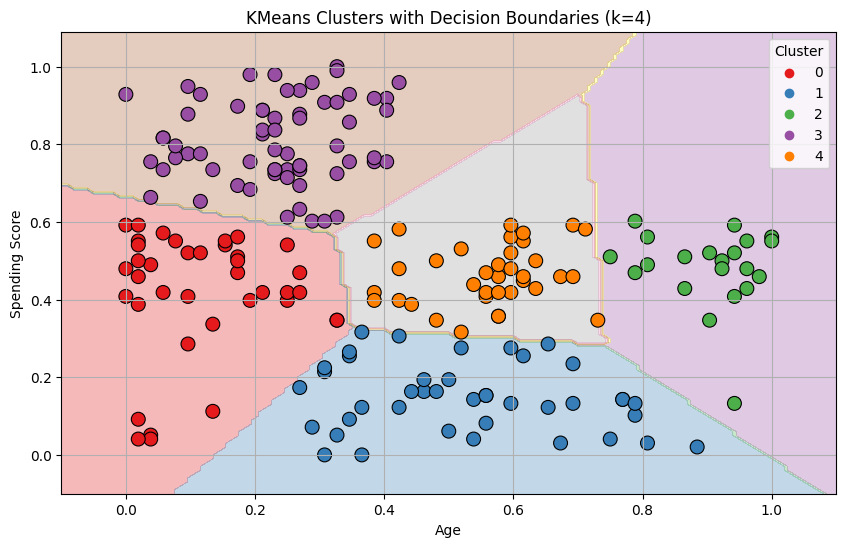

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Fit KMeans model (if not already done)
m3 = KMeans(n_clusters=5, n_init=10, random_state=42)
X_3['Cluster'] = m3.fit_predict(X_3)

# Create mesh grid over feature space
h = 0.01  # step size
x_min, x_max = X_3['Age'].min() - 0.1, X_3['Age'].max() + 0.1
y_min, y_max = X_3['Spending Score (1-100)'].min() - 0.1, X_3['Spending Score (1-100)'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict cluster labels for each grid point
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = m3.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))

# Background colored by cluster label
plt.contourf(xx, yy, Z, cmap='Set1', alpha=0.3)
# Scatter plot of actual data points
sns.scatterplot(data=X_3, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100, edgecolor='k')

plt.title('KMeans Clusters with Decision Boundaries (k=4)')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid(True)
plt.legend(title='Cluster')
plt.savefig('fig2.png')
plt.show()


In [31]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score
score = silhouette_score(X_3.drop('Cluster', axis=1), X_3['Cluster'])

print(f"Silhouette Score for KMeans (k=5): {score:.4f}")


Silhouette Score for KMeans (k=5): 0.4463


## Segmentation using Age,Annual Income (k$),Spending Score(1-100)


In [32]:
X_4  = df1[['Age','Annual Income (k$)','Spending Score (1-100)']]

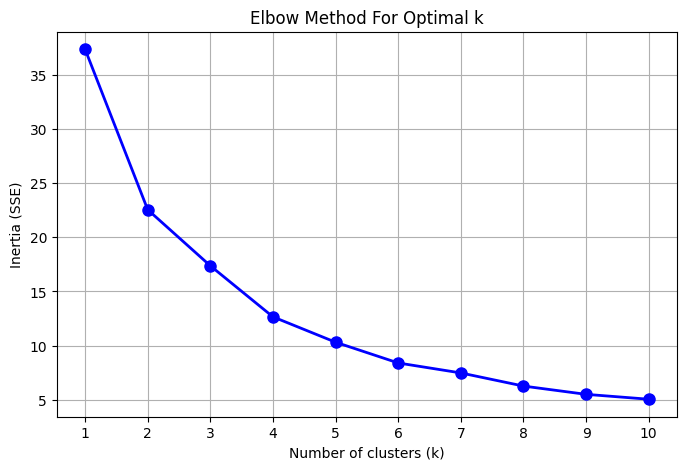

In [33]:
# Elbow method: compute inertia for k=1 to 10
inertia = []
K_range_4 = range(1, 11)
for k in K_range_4:
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=42)
    kmeans.fit(X_4)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range_4, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K_range_4)
plt.grid(True)
plt.show()

Best K is 6

In [34]:
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.cluster import KMeans

# KMeans clustering
kmeans4 = KMeans(n_clusters=6, n_init=10, random_state=42)
labels3 = kmeans4.fit_predict(X_4)

# Assign cluster labels to dataframe
X_4['Cluster'] = labels3

# Create 3D scatter plot
trace1 = go.Scatter3d(
    x=X_4['Age'],
    y=X_4['Spending Score (1-100)'],
    z=X_4['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=X_4['Cluster'],     # Color by cluster
        size=8,
        opacity=0.8,
        line=dict(color='black', width=1)
    )
)

data = [trace1]

layout = go.Layout(
    title='KMeans Clustering (3D)',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score (1-100)'),
        zaxis=dict(title='Annual Income (k$)')
    )
)

fig = go.Figure(data=data, layout=layout)
plt.savefig('fig3.png')
py.iplot(fig)


<Figure size 640x480 with 0 Axes>

In [35]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score
score = silhouette_score(X_4.drop('Cluster', axis=1), labels3)

print(f"Silhouette Score for KMeans (k=6): {score:.4f}")


Silhouette Score for KMeans (k=6): 0.4235


## Segmentation using Gender,Annual Income (k$),Spending Score(1-100)


In [36]:
X_5  = df1[['Gender','Annual Income (k$)','Spending Score (1-100)']]

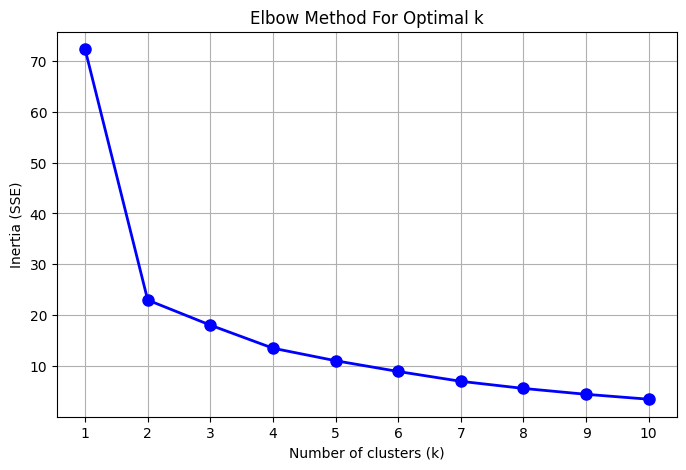

In [37]:
# Elbow method: compute inertia for k=1 to 10
inertia = []
K_range_5 = range(1, 11)
for k in K_range_5:
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=42)
    kmeans.fit(X_5)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range_5, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K_range_5)
plt.grid(True)
plt.show()

Optimal k is 5

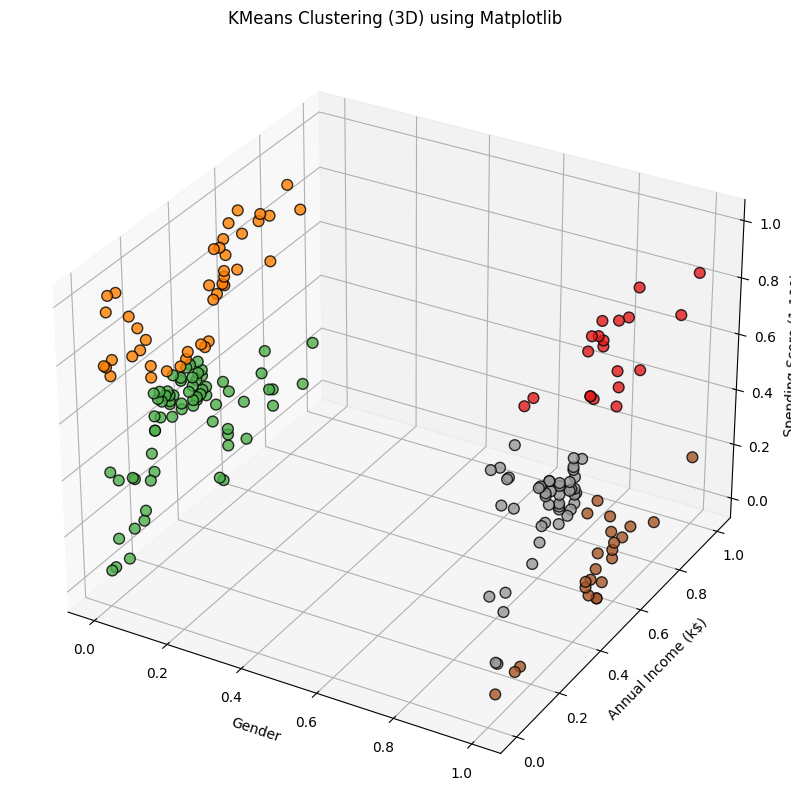

In [38]:
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.cluster import KMeans

# Initialize Plotly for notebooks (IMPORTANT!)
py.init_notebook_mode(connected=True)

# KMeans clustering
kmeans5 = KMeans(n_clusters=5, n_init=10, random_state=42)
labels4 = kmeans5.fit_predict(X_5)

# Assign cluster labels to dataframe
X_5['Cluster'] = labels4

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Prepare the 3D figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters
scatter = ax.scatter(
    X_5['Gender'],
    X_5['Annual Income (k$)'],
    X_5['Spending Score (1-100)'],
    c=X_5['Cluster'],       # Cluster colors
    cmap='Set1',
    s=60,
    edgecolor='k',
    alpha=0.8
)

# Set axis labels
ax.set_xlabel('Gender')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('KMeans Clustering (3D) using Matplotlib')
plt.savefig('fig4.png')
plt.show()


In [39]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score
score = silhouette_score(X_5.drop('Cluster', axis=1), labels4)

print(f"Silhouette Score for KMeans (k=5): {score:.4f}")


Silhouette Score for KMeans (k=5): 0.4121


## Segmentation using Age,Gender,Spending Score(1-100)

In [40]:
X_6  = df1[['Age','Gender','Spending Score (1-100)']]

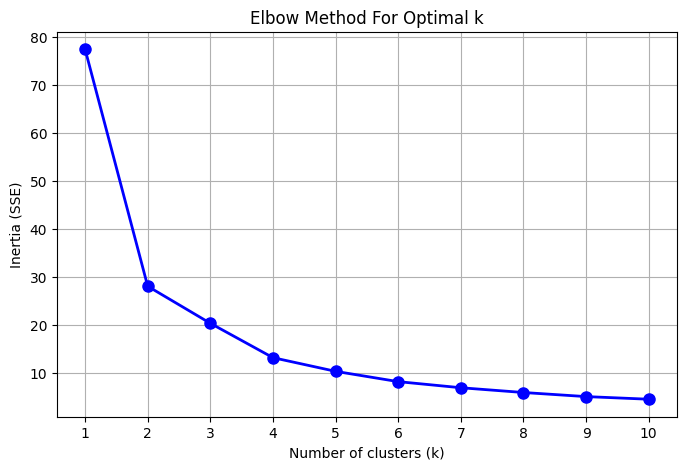

In [41]:
# Elbow method: compute inertia for k=1 to 10
inertia = []
K_range_6 = range(1, 11)
for k in K_range_6:
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=42)
    kmeans.fit(X_6)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range_6, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K_range_6)
plt.grid(True)
plt.show()

Best k is 5

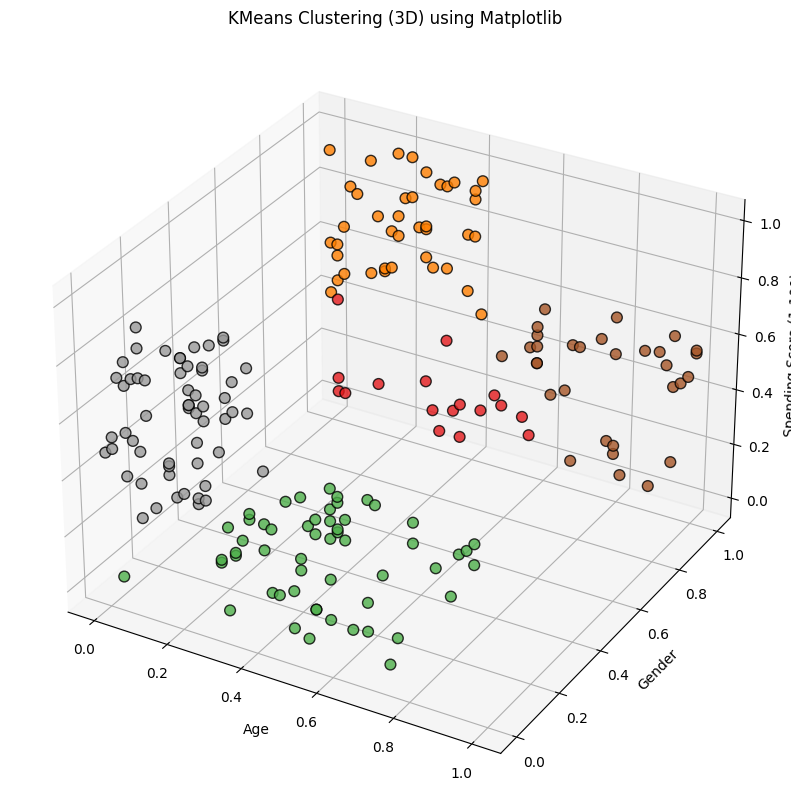

In [42]:
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.cluster import KMeans

# KMeans clustering
kmeans6 = KMeans(n_clusters=5, n_init=10, random_state=42)
labels5 = kmeans6.fit_predict(X_6)

# Assign cluster labels to dataframe
X_6['Cluster'] = labels5

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Prepare the 3D figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with clusters
scatter = ax.scatter(
    X_6['Age'],
    X_6['Gender'],
    X_6['Spending Score (1-100)'],
    c=X_6['Cluster'],       # Cluster colors
    cmap='Set1',
    s=60,
    edgecolor='k',
    alpha=0.8
)

# Set axis labels
ax.set_xlabel('Age')
ax.set_ylabel('Gender')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('KMeans Clustering (3D) using Matplotlib')
plt.savefig('fig5.png')

plt.show()


In [43]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score
score = silhouette_score(X_6.drop('Cluster', axis=1), labels5)

print(f"Silhouette Score for KMeans (k=4): {score:.4f}")


Silhouette Score for KMeans (k=4): 0.4772
